In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

from filtering.utils import simulate as sim
from filtering.filtering import particle_filter as pf
from importlib import reload

In [53]:
reload(sim)

<module 'filtering.utils.simulate' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/utils/simulate.py'>

In [54]:
S0 = 100
mu = 0.02
kappa = 3.5 # mean reversion rate
theta = 0.05
sigma = 0.1308
nu = 0.0726
eta = 4 # long-term rate of change
lda = 8 # time change vol

T = 1
N = 200
dt = T/N

In [55]:
vgsa_params = [mu, kappa, theta, sigma, nu, eta, lda]

In [56]:
y, jumps = sim.simulate_vgsa(vgsa_params, S0, N=N, dt=dt)

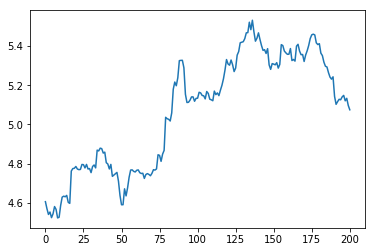

In [57]:
plt.plot(y)
plt.show()

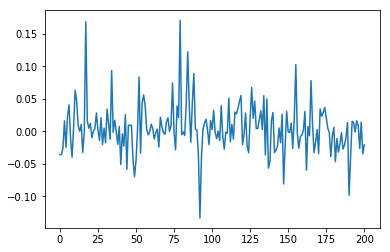

In [58]:
plt.plot(jumps)
plt.show()

In [285]:
reload(pf)

<module 'filtering.filtering.particle_filter' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/particle_filter.py'>

In [286]:
num_particles = 1000
pf_vgsa = pf.PFVGSA(N=num_particles, dt=dt)

In [287]:
vgsa_params

[0.02, 3.5, 0.05, 0.1308, 0.0726, 4, 8]

In [288]:
mu_ = (0.01, 0.05)
kappa_ = (2, 4) # mean reversion rate
theta_ = (0.01, 0.1)
sigma_ = (0.1, 0.2)
nu_ = (0.02, 0.1)
eta_ = (3,6) # long-term rate of change
lda_ = (6,10) # time change vol

In [289]:
vgsa_params_bounds = [mu_, kappa_, theta_, sigma_, nu_, eta_, lda_]

In [290]:
# vol_pred, arrivals, params_steps = pf_vgsa.filter(y, vgsa_params_bounds, is_bounds=True)

### Filtering by using arrival rate as (hidden) state

In [291]:
arrivals, param_steps = pf_vgsa.filter_arrival(y, vgsa_params_bounds, is_bounds=True)

resampling since: 2.1909796115599183
resampling since: 1.0000003870323078
num neg. arrival rate: 168
resampling since: 1.3637844192740602
num neg. arrival rate: 19
resampling since: 91.44151047346642
num neg. arrival rate: 172
resampling since: 7.406870592889766
num neg. arrival rate: 43
resampling since: 44.679471385846014
num neg. arrival rate: 138
resampling since: 46.23300781847444
num neg. arrival rate: 89
resampling since: 11.571761210200421
num neg. arrival rate: 56
resampling since: 18.29853201099175
num neg. arrival rate: 77
resampling since: 13.511939900760101
num neg. arrival rate: 73
resampling since: 13.138713426177647
num neg. arrival rate: 80
resampling since: 1.3393789668359448
num neg. arrival rate: 13
resampling since: 4.475515752528961
num neg. arrival rate: 51
resampling since: 21.431740918664595
num neg. arrival rate: 116
resampling since: 12.218813531761386
num neg. arrival rate: 69
resampling since: 6.405645259951346
num neg. arrival rate: 71
resampling since: 50

num neg. arrival rate: 81
resampling since: 4.01807442065631
num neg. arrival rate: 57
resampling since: 38.309544567223874
num neg. arrival rate: 143
resampling since: 15.354110941895321
num neg. arrival rate: 56
resampling since: 22.587822381620704
num neg. arrival rate: 71
resampling since: 11.795651026733918
num neg. arrival rate: 108
resampling since: 11.672113492194116
num neg. arrival rate: 61
resampling since: 24.337168948508296
num neg. arrival rate: 95
resampling since: 10.43535596580971
num neg. arrival rate: 56
resampling since: 5.806990820633131
num neg. arrival rate: 46
resampling since: 5.442324588280871
num neg. arrival rate: 60
resampling since: 14.196193829624793
num neg. arrival rate: 68
resampling since: 11.368723488058599
num neg. arrival rate: 75
resampling since: 6.162800394713954
num neg. arrival rate: 40
resampling since: 5.799835913098918
num neg. arrival rate: 68
resampling since: 12.839927508906154
num neg. arrival rate: 65
resampling since: 30.0319837973305

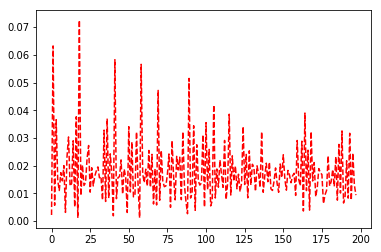

In [297]:
plt.plot(arrivals[3:], 'r--')
# plt.plot(vol, 'b--')
plt.show()

In [307]:
vgsa_params

[0.02, 3.5, 0.05, 0.1308, 0.0726, 4, 8]

# Plot parameter convergence

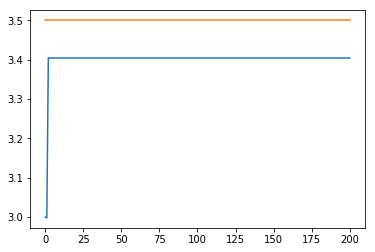

In [325]:
plt.plot(param_steps[1])
plt.plot(np.ones(len(param_steps[1]))*vgsa_params[1])
plt.show()

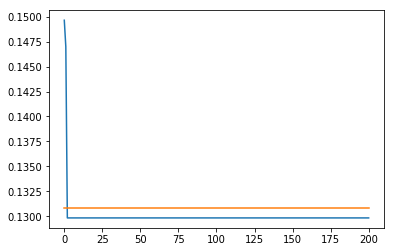

In [326]:
plt.plot(param_steps[3])
plt.plot(np.ones(len(param_steps[3]))*vgsa_params[3])
plt.show()